# Data Skolverket.se

Statistik från Skolverket, http://siris.skolverket.se

Grundskolan - Salsa, skolenheters resultat av slutbetygen i årskurs 9 med hänsyn till elevsammansättningen
Valt läsår: 2014/15

In [8]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40, 10# Make figures a little bigger

In [9]:
# Note: the decimal sign must be parsed as ","
df = pd.read_csv('data/exp_salsa_2014_15.csv', delimiter=None, sep=";", encoding="utf-8", decimal=",")
df.head(10)

,Kommun,Skola,Skol-enhetskod,Huvudman,Föräldrarnas genomsnittliga utb.nivå,Andel (%) nyinvandrade,Andel (%) födda utomlands,Andel (%) med utländsk bakgrund,Andel (%) pojkar,Faktiskt värde (F),Modell- beräknat värde (B),Residual (R=F-B),Faktiskt värde (F).1,Modell- beräknat värde (B).1,Residual (R=F-B).1
0,Ale,Ahlafors Fria skola,71387206,Fristående,2.31,0,NaN,NaN,45,86,84,2,226,236,-10
1,Ale,Aroseniusskolan,48529699,Kommunal,2.15,0,NaN,NaN,51,61,78,-17,196,223,-27
2,Ale,Bohusskolan,11043800,Kommunal,2.00,0,NaN,NaN,69,82,73,9,218,208,10
3,Ale,Da Vinciskolan,61084420,Kommunal,2.21,6,NaN,NaN,52,64,76,-11,195,222,-26
4,Alingsås,Gustav Adolfsskolan,74064638,Kommunal,2.36,0,NaN,NaN,57,86,85,1,226,236,-10
5,Alingsås,Montessoriskolan Globen,87109819,Fristående,2.61,0,NaN,NaN,39,98,94,4,264,259,5
6,Alingsås,Nolhagaskolan,84581048,Kommunal,2.23,1,NaN,NaN,53,87,80,7,234,227,7
7,Alingsås,Sollebrunns skola 6-9,76908037,Kommunal,2.14,0,NaN,NaN,43,90,78,12,236,225,11
8,Alingsås,Vittra Gerdsken,98272016,Fristående,2.25,0,NaN,NaN,56,96,81,14,249,229,20
9,Alingsås,Östlyckeskolan 8-9,20234335,Kommunal,2.26,10,NaN,NaN,53,67,74,-7,204,221,-17


In [10]:
# Mean value of percent of newly arrived immigrants. 
df["Andel (%) nyinvandrade"].mean()

4.728421052631579

In [4]:
# Friskola = private school
friskola = df.loc[df["Huvudman"] == "Fristående"]
print("FRISKOLOR")
print("Andel nyinvandrade: " + str(round(friskola["Andel (%) nyinvandrade"].mean(), 2)) + " procent.")
print("Föräldrars utbildningsnivå: " + str(round(friskola["Föräldrarnas genomsnittliga utb.nivå"].mean(), 2)))

FRISKOLOR
Andel nyinvandrade: 1.21 procent.
Föräldrars utbildningsnivå: 2.39


In [11]:
# Kommunal = public school
kommunal = df.loc[df["Huvudman"] == "Kommunal"]
print("KOMMUNALA")
print("Andel nyinvandrade: " + str(round(kommunal["Andel (%) nyinvandrade"].mean(), 2)) + " procent.")
print("Föräldrars utbildningsnivå: " + str(round(kommunal["Föräldrarnas genomsnittliga utb.nivå"].mean(), 2)))

KOMMUNALA
Andel nyinvandrade: 5.8 procent.
Föräldrars utbildningsnivå: 2.21


In [12]:
gbg = df.loc[df['Kommun'] == "Göteborg"].sort_values("Andel (%) nyinvandrade", ascending=False)
#gbg

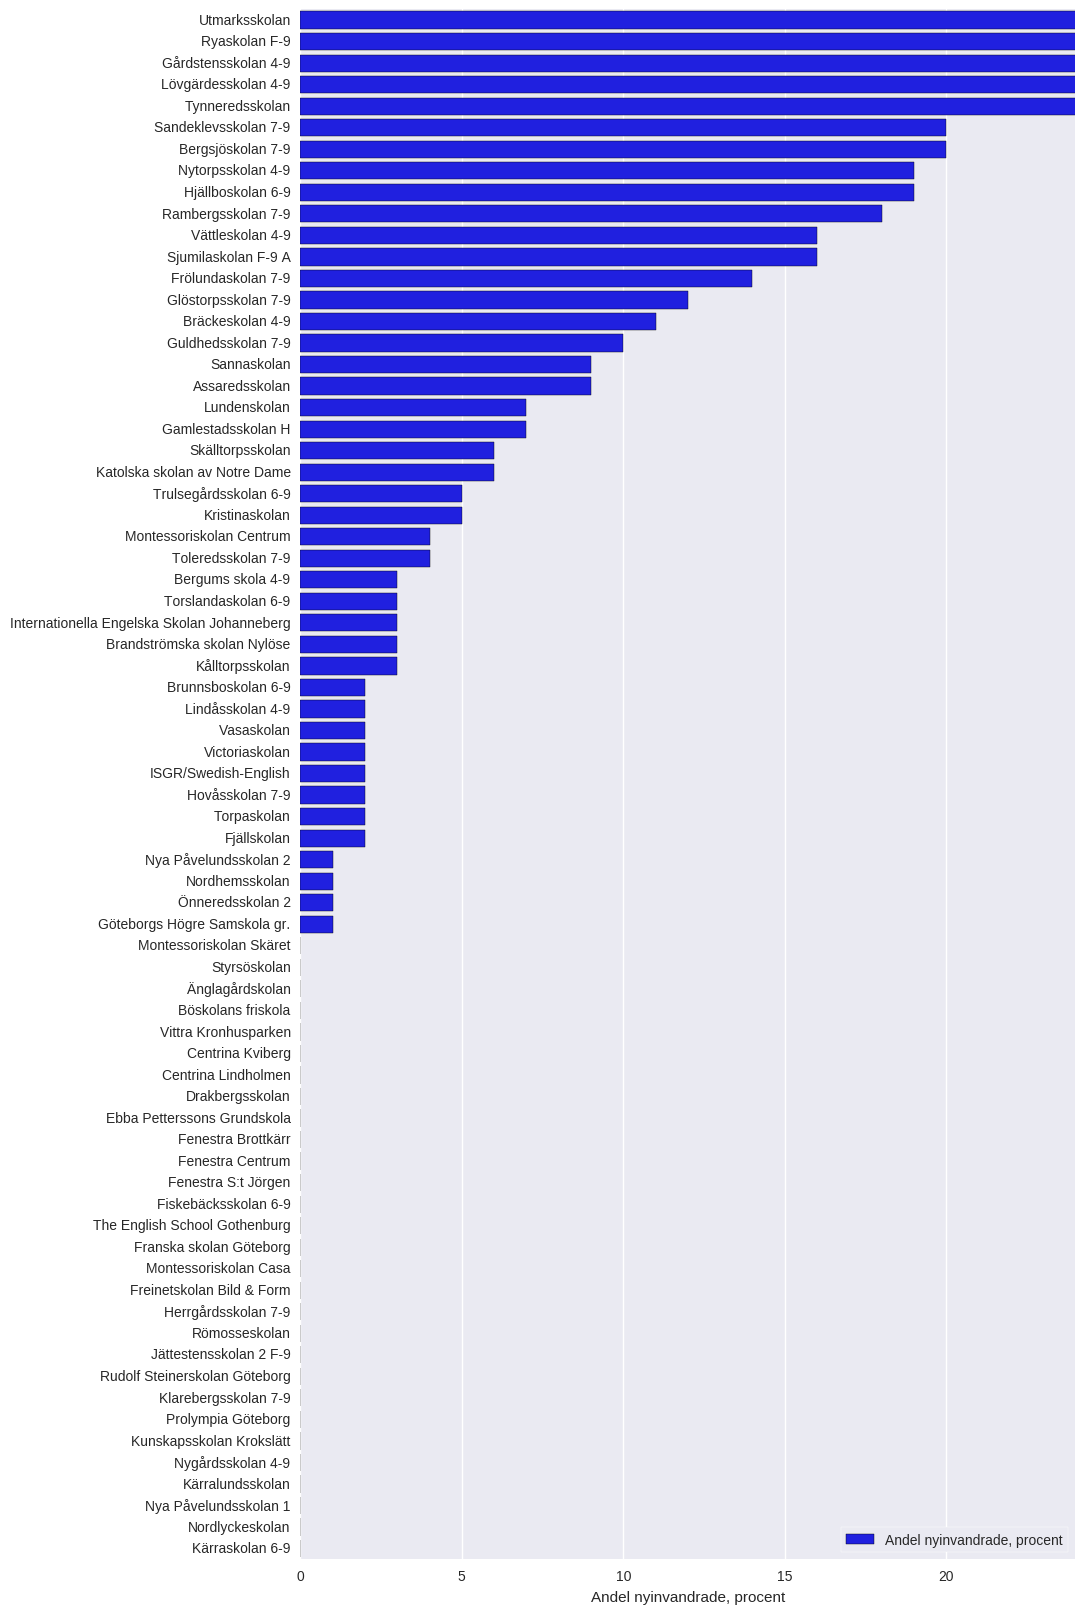

In [13]:
f, ax = plt.subplots(figsize=(10, 20))
sns.barplot(x="Andel (%) nyinvandrade", y="Skola", data=gbg,
           label="Andel nyinvandrade, procent", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Andel nyinvandrade, procent")
sns.despine(left=True, bottom=True)

plt.savefig("skolorgbg.png")

## Metadata
Rapportbeskrivning och definitioner etc.  	
	
Resultaten som visas i SALSA är framtagna med hjälp av regressionsanalys. I modellen 	
jämförs varje skolenhets genomsnittliga resultat med samtliga skolenheters genomsnittliga 	
resultat. Samtidigt konstanthålls olika bakgrundsfaktorer som har stor betydelse för 	
resultatet i skolarbetet och ger varje skolenhet ett modellberäknat betygsvärde. 	
Jämförelsen mellan faktiskt och modellberäknat värde presenteras som residualer. 	
Dessa antar negativa och positiva värden samt värdet noll. 	
	
Om en skolenhet har residual noll innebär det att skolenheten har lika resultat som alla 	
andra skolenheter med samma förutsättningar. Om en skolenhet har negativ residual 	
innebär det att den har ett lägre resultat jämfört med samtliga andra skolenheter som har 	
likadan elevsammansättning. Som modellen är konstruerad innebär det att hälften av 	
skolenheterna är under rikets genomsnittliga resultat och hälften är över rikets 	
genomsnittliga resultat. Majoriteten av skolenheterna har ett resultat som ligger nära 	
genomsnittet.	
	
	
	
Skola	För att ingå i SALSA ska
	-skolenheten ha minst 15 elever i årskurs 9. 
	-skolenheten ha uppgifter om föräldrarnas utbildningsnivå för fler än 75 % av eleverna i årskurs 9.
Föräldrarnas genomsn. utb.nivå	Elevernas, båda eller ena, föräldrars genomsnittliga utbildningsnivå har beräknats genom att omvandla genomgången
	folkskola/grundskola till 1 poäng, genomgången gymnasial utbildning till 2 poäng och eftergymnasial utbildning till 3 poäng. 
	För varje skolenhet beräknas en genomsnittlig utbildningsnivå.
Andel (%) nyinvandrade	Andel elever som har kommit till Sverige för första gången under de fyra senaste åren. 
	Från och med SALSA 2015 ingår elever som har okänd bakgrund. Dessa elever saknar personnummer om de 
	till exempel ej är folkbokförda i Sverige.
	Resterande elever utgör övriga vilket har inkluderat elever med okänd bakgrund till och med SALSA 2014.
Andel (%) födda utomlands	Andel elever som är födda utomlands på skolenheten.
	Resterande elever utgör övriga vilket inkluderar elever med okänd bakgrund.
Andel (%) med utländsk bakgr.	Andel elever som är födda i Sverige med båda föräldrarna födda utomlands på skolenheten. 
	Resterande elever utgör övriga vilket inkluderar elever med okänd bakgrund.
Andel (%) pojkar	Andel pojkar på skolenheten. Samtliga elever har uppgift om kön.
Andel (%) som uppn. kunsk.kr.	Skolenhetens andel elever som uppnått kunskapskraven för lägst E, dvs godkänt betyg A-E i samtliga ämnen från och med läsåret 12/13.
	Läsåren 97/98-11/12 var det elever som nått målen, dvs något av betygen godkänt (G), väl godkänt (VG), mycket väl godkänt (MVG) i samtliga ämnen.
Genomsnittligt meritvärde	Skolenhetens genomsnitt av summan av elevernas 17 bästa ämnen för elever som läst moderna språk som språkval, från och med läsåret 2014/15.
	Tidigare och för övriga elever är det 16 ämnen.
